In [125]:
# All of the common imports and settings
import numpy as np
import scipy.ndimage as ndi
from skimage import io, color, feature, filters, segmentation, measure, draw, exposure, morphology, transform
import matplotlib as mpl
import matplotlib.pylab as plt
import cv2 # OpenCV
%matplotlib inline

import imutils

In [126]:
image = color.rgb2gray(io.imread("Print_Payment_Receipt.JPG"))

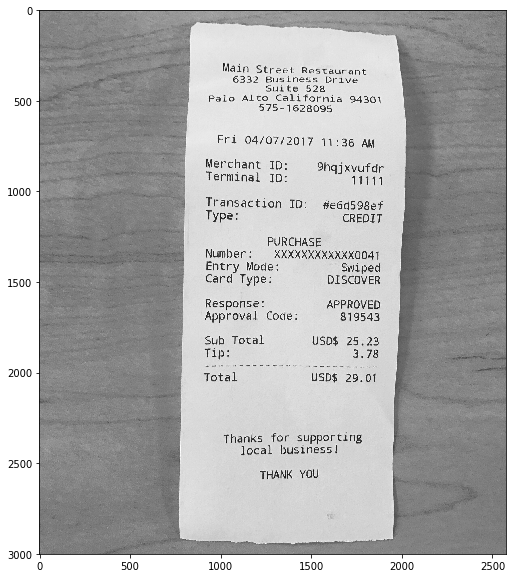

In [127]:
plt.figure(figsize=(10,10))
plt.imshow(image)

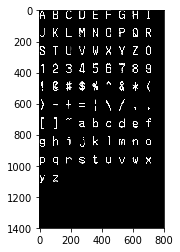

In [128]:
digits = color.rgb2gray(io.imread("Merchant_digits_2.png"))
plt.imshow(digits)

In [129]:
SAMPLES = [0]

height = 65
h_gap = 50
width = 45
w_gap = 40


training_data = []

for i in range(10):
    for j in range(9):
        top = i * (height  + h_gap)
        left = j * (width + w_gap)
        bottom = top + height
        right = left + width

        digit_im = digits[top:bottom, left:right]


        fv = feature.hog(digit_im*255, block_norm = 'L2-Hys').astype('float32')


        training_data.append(fv)

training_data = np.vstack(training_data)[:-7]

resps = []
characters = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O"
               ,"P","Q","R","S","T","U","V","W","X","Y","Z","0","1","2","3"
              ,"4","5","6","7","8","9","!","@","#","$","%","^","&","*","("
              ,")","-","+","=","|","\\","/",",",".","[","]","~","a","b","c"
              ,"d","e","f","g","h","i","j","k","l","m","n","o","p","q","r"
              ,"s","t","u","v","w","x","y","z"]

for ch in characters:
    resps.append(ord(ch))
resps = np.array(resps)

svm = cv2.ml.SVM_create()

svm.setKernel(cv2.ml.SVM_LINEAR)

svm.setType(cv2.ml.SVM_C_SVC)

svm.train(training_data, cv2.ml.ROW_SAMPLE, resps)

True

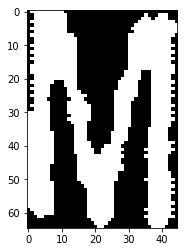

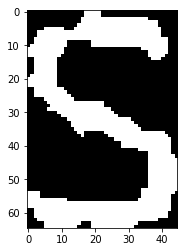

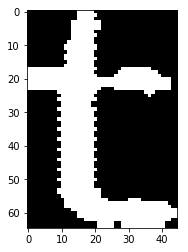

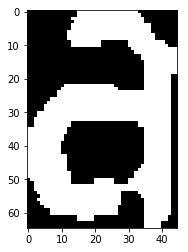

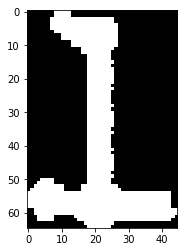

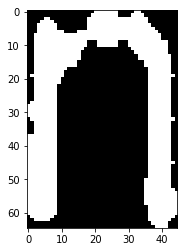

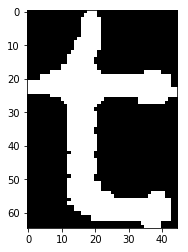

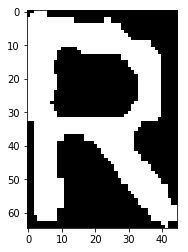

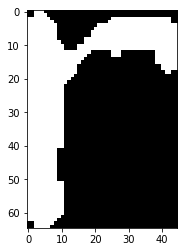

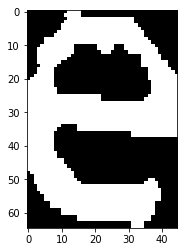

In [144]:
# Basic pre-processing
gray = color.rgb2gray(image) # or cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
blur = (filters.gaussian(gray, 1.5)*255).round().astype('uint8') # or cv2.GaussianBlur(gray, (-1, -1), 1.5, 1.5) or cv2.GaussianBlur(gray, (11, 11), 0)
th = blur <= filters.threshold_local(blur, 7, 'mean', 2) # or th = cv2.bitwise_not(cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 2))

th = morphology.remove_small_objects(th, 200)
# Connected components to get largest component
lbls = measure.label(th, connectivity=2)
props = measure.regionprops(lbls)


counter = 0
receipt_letters = []
receipt_text = np.zeros(image.shape, 'uint8')


for k in props:

    h,w = k.image.shape[:2]

    if counter == 10:
        break

    if w <40:    
        # Deskew/Rotate image
        if False: #abs(k.moments_central[0,2]) > 1e-2:
            skew = k.moments_central[1,1]/k.moments_central[0,2]
            M = np.array([[1, -skew, height*skew], [0, 1, 0]], 'float32')
            im = cv2.warpAffine(k.image.view('uint8'), M, (width, height), flags=cv2.WARP_INVERSE_MAP|cv2.INTER_LINEAR)
        else:
            im = cv2.resize(k.image.view('uint8'),(width,height) ).view(bool)

        counter +=1
        receipt_letters.append(im)
        

        plt.figure()
        plt.imshow(im)



In [146]:
for letter in receipt_letters:
    fv = feature.hog(letter*255, block_norm='L2-Hys').astype('float32')
    # Ask SVM to predict
    digit = svm.predict(fv[None,:])[1].squeeze()
    # Print out the result
    print(chr(digit))

W
-
m
a
I
L
m
H
L
E


In [142]:
x,y = int(round(512/9 * j + 512/9/4)), int(round(512/9 * (i+1) - 519/9/8))
board_text = np.zeros((height, width, 4), 'uint8')
board_text = cv2.putText(board_text, # destination image (will be modified)
                                 receipt_letters, # text to write
                                 (x,y), # lower-left corner to start writing from
                                 cv2.FONT_HERSHEY_SIMPLEX, # font to use
                                 1.5, # font size (just need to play around with to get it right)
                                 (255, 0, 0, 255), # color w/ transparency
                                 1, cv2.LINE_AA) # line thickness and anti-aliased

TypeError: bad argument type for built-in operation

In [36]:
training_data.shape

(90, 1458)

In [39]:
cell.shape

(47, 33)

In [40]:
digit_im.shape

(65, 45)

In [45]:
chr(32)

' '

In [124]:
image.shape

(3001, 2577)